In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data=pd.read_csv('Walmart (1).csv')

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.shape

(6435, 8)

In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
numeric_data = data.drop(columns=['Date'])
sb.heatmap(numeric_data, annot=True, cmap="coolwarm")
plt.title('correlation matrix')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(data['Weekly_Sales'], bins=30, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['Weekly_Sales'], bins=30)
plt.title('distribution of weekly sales')
plt.xlabel('weekly sales')
plt.ylabel('frequency')
plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

plt.figure(figsize=(12,6))
plt.scatter(data['Date'], data['Weekly_Sales'], marker='o', linestyle='-')
plt.title('sales over time')
plt.xlabel('Date')
plt.ylabel('Weekly sales')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sb.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('impact of holidays on sales')

plt.xlabel('Holidays')
plt.ylabel('Weekly sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

Root Mean Squared Error: 425476.1508121


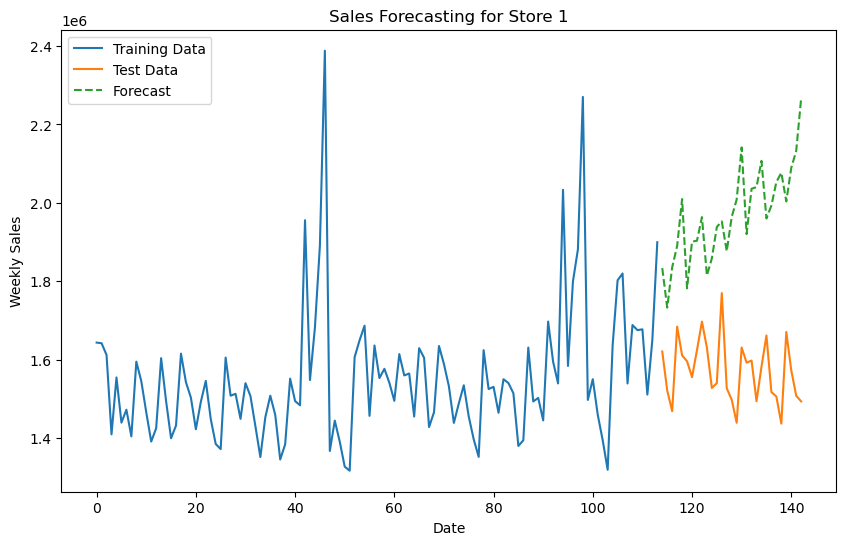

In [13]:
store_data = data[data['Store'] == 1]

# Split data into train and test sets
train_size = int(len(store_data) * 0.8)
train, test = store_data[:train_size], store_data[train_size:]

# Fit SARIMA model
model = SARIMAX(train['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast sales
forecast = model_fit.forecast(steps=len(test))

# Evaluate forecast
rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast))
print("Root Mean Squared Error:", rmse)

# Plot actual vs forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Training Data')
plt.plot(test.index, test['Weekly_Sales'], label='Test Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title("Sales Forecasting for Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()




            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


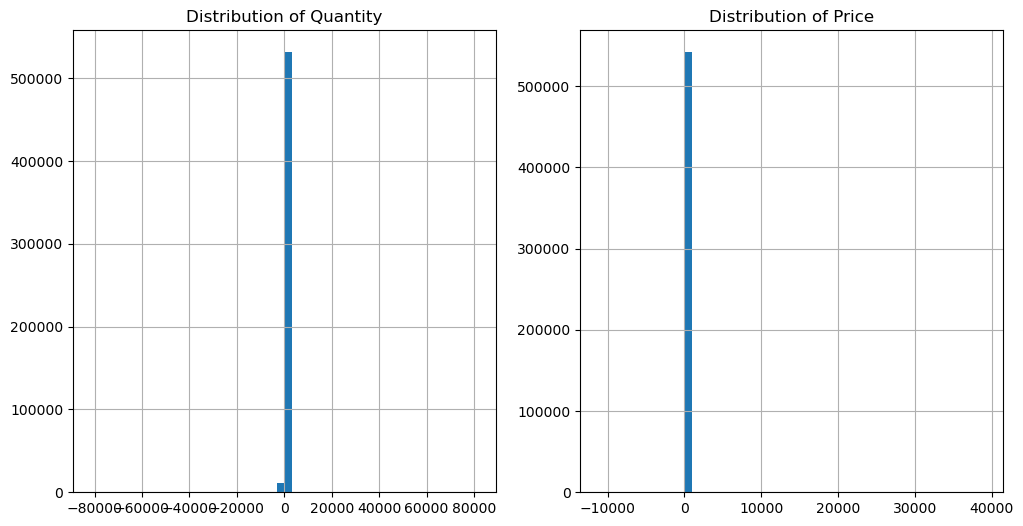

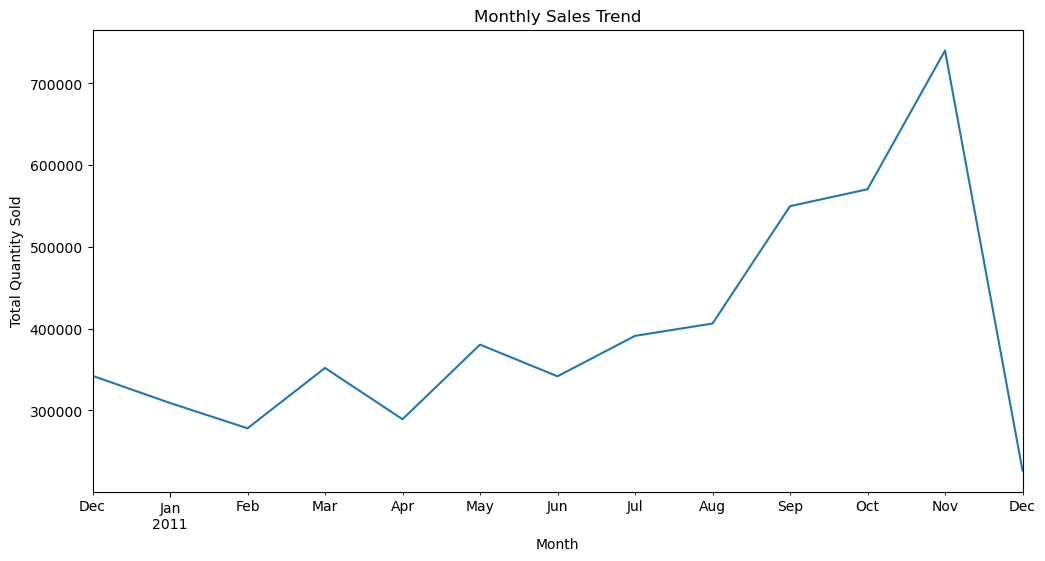

Top 10 most purchased products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64
Distribution of purchases across countries:
Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus        

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


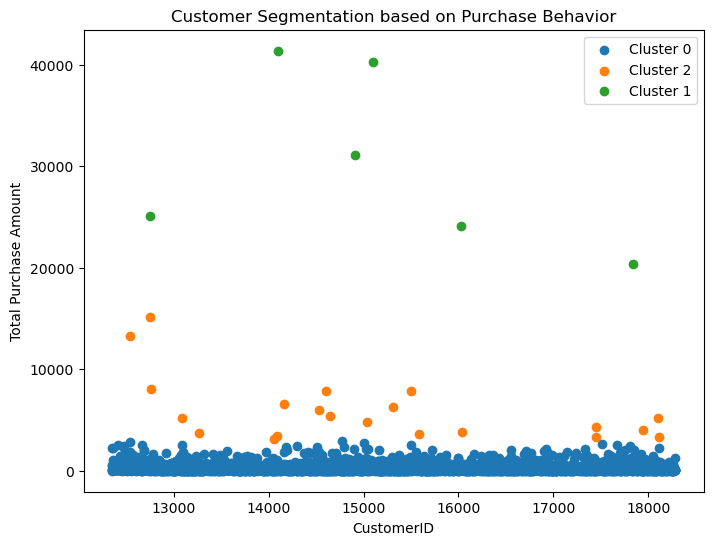

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("OnlineRetaildata.csv", encoding='ISO-8859-1')

# Exploratory Data Analysis
# Summary statistics
print(data.describe())

# Distribution of features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['Quantity'].hist(bins=50)
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
data['UnitPrice'].hist(bins=50)
plt.title('Distribution of Price')

plt.show()

# Trends over time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

# Most purchased products
top_products = data['Description'].value_counts().head(10)
print("Top 10 most purchased products:")
print(top_products)

# Distribution of purchases across countries
country_distribution = data['Country'].value_counts()
print("Distribution of purchases across countries:")
print(country_distribution)

# Customer Segmentation
# Calculate total purchase amount per customer
customer_purchase = data.groupby('CustomerID')['UnitPrice'].sum().reset_index()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_purchase[['UnitPrice']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_purchase['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in customer_purchase['Cluster'].unique():
    plt.scatter(customer_purchase[customer_purchase['Cluster'] == cluster]['CustomerID'],
                customer_purchase[customer_purchase['Cluster'] == cluster]['UnitPrice'],
                label=f'Cluster {cluster}')
plt.title('Customer Segmentation based on Purchase Behavior')
plt.xlabel('CustomerID')
plt.ylabel('Total Purchase Amount')
plt.legend()
plt.show()
